In [16]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import scipy as scs
import scipy.stats as stats
import statistics
from scipy.stats import norm
import math

In [8]:
# List the tickers to be retreived
tickers = ['BAC']

# get close data of the tickers
data = pdr.get_data_yahoo(tickers, start="2009-01-01", end=dt.date.today())['Adj Close']

# return the natural log of daily changes
lnReturns = np.log(data / data.shift(1))[1:]

# Rename column for generic script
lnReturns = lnReturns.rename(columns={lnReturns.columns[0]:'close'})
lnReturns.describe()

Symbols,close
count,3395.000000
mean,0.000288
std,0.029805
min,-0.342059
25%,-0.010611
50%,0.000443
75%,0.011538
max,0.302096


In [9]:
# Calculate the mean and standard deviations
port_mean = sum(lnReturns['close'])/len(lnReturns['close'])
port_std = np.std(lnReturns['close'])

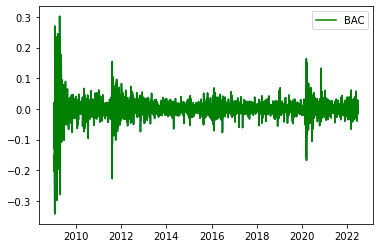

In [13]:
# plot the logged returns to visuallise and identify any outliers
plt.plot(lnReturns)
plt.plot(lnReturns['close'], label=tickers[0], color='green')
plt.legend()

Text(-0.3186577070269578, 378.0, 'Kurtosis: [26.1581]')

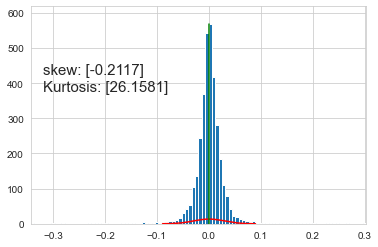

In [19]:
# Visuallising the logged returns distribution
## Histogram
hist = plt.hist(lnReturns['close'],bins=100)

## Generating the normal curve
x = np.linspace(port_mean - 3*port_std, port_mean+3*port_std,1000)

## Plotting the comparable normal curve
plt.plot(x, scs.stats.norm.pdf(x, port_mean, port_std), "r")

## *Adjust the scope*
plt.axis([float(lnReturns.min()), float(lnReturns.max()), 0, max(hist[0])+(max(hist[0]))/11])

## Testing the skew and kurtosis functions
#skew = stats.skew(lnReturns, bias=False)
#kurtosis = stats.kurtosis(lnReturns, bias=False)
#print(' skew: {}'.format(skew),"\n", 'kurtosis: {}'.format(kurtosis))

## Adding a mean line
plt.plot([port_mean,port_mean],[0,max(hist[0])],color="g",label='mean')

## adding skew and kurtosis information to chart // text size and location can be amended but generic ones are attempted
plt.text(float(lnReturns.min())+(0.2*float(lnReturns.min())**2),max(hist[0])-(max(hist[0]))/4,'skew: {}'.format(np.round(stats.skew(lnReturns, bias=False),4)), fontsize=15)
plt.text(float(lnReturns.min())+(0.2*float(lnReturns.min())**2),max(hist[0])-(max(hist[0]))/3,'Kurtosis: {}'.format(np.round(stats.kurtosis(lnReturns, bias=False),4)), fontsize=15)

In [31]:
def compute_var(x, alpha):
    return -np.percentile(x, alpha)

def compute_es(x, alpha):
    x_alpha = -compute_var(x, alpha)
    prct = sum(x<=x_alpha)/len(x) 
    y=x*(x<=x_alpha)
    es = -1.0/alpha*(y.mean()+ x_alpha*(alpha-prct))
    return es

print('The simple historical VaR is        {}'.format(compute_var(lnReturns['close'], 1)))
print('Corresponding expected shortfall is {}'.format(compute_es(lnReturns['close'], 1)))

The simple historical VaR is        0.08232294587119615
Corresponding expected shortfall is 0.08291620056254954


In [53]:
var = compute_var(lnReturns['close'], 1)
es = lnReturns[lnReturns.lt(var, axis=1)].mean()
es

Symbols
close   -0.00109
dtype: float64

In [36]:
y= x<=-compute_var(lnReturns, 1)

In [33]:
min(lnReturns['close'])

-0.3420585121775866

In [38]:
y.mean()

0.038